In [1]:
%matplotlib inline

In [2]:

import tensorflow as tf


In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
import cv2
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
nb_classes = 12

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test0  original shape", X_test[0].shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test0  original shape (28, 28)


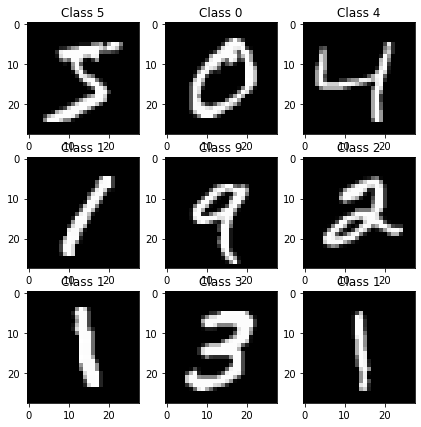

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [8]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print(len(Y_train))
print(len(Y_train[0]))
print(Y_train)
print(Y_test)

60000
12
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [10]:
linestr=''
for i in range(len(X_train[0])):
    j=i%28
    if(j==0):
        print(linestr)
        linestr=""
    linestr+="%.1f"%X_train[0][i]+" "


0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.1 0.5 0.5 0.7 0.1 0.7 1.0 1.0 0.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.4 0.6 0.7 1.0 1.0 1.0 1.0 1.0 0.9 0.7 1.0 0.9 0.8 0.3 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.4 0.3 0.3 0.2 0.2 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.9 1.0 1.0 1.0 1.0 1.0 0.8 0.7 1.0 0.9 0.0 0.0 0.0 0.0 0.0 0.0

In [11]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 114us/step - loss: 0.2532 - val_loss: 0.1091
Epoch 2/4
60000/60000 [==============================] - 7s 111us/step - loss: 0.1015 - val_loss: 0.0798
Epoch 3/4
60000/60000 [==============================] - 7s 113us/step - loss: 0.0712 - val_loss: 0.0708
Epoch 4/4
60000/60000 [==============================] - 7s 112us/step - loss: 0.0564 - val_loss: 0.0634


In [12]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

10000/10000 [==============================] - 0s 49us/step
0.0634430416614865


In [13]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

print(predicted_classes)
print(len(predicted_classes))

# Check which items we got right / wrong
predictyes=(predicted_classes == y_test)
print(predictyes)

predictnum=np.nonzero(predictyes)
print(predictnum)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print("correct",correct_indices)
print("incorrect",incorrect_indices)

[7 2 1 ... 4 5 6]
10000
[ True  True  True ...  True  True  True]
(array([   0,    1,    2, ..., 9997, 9998, 9999], dtype=int64),)
correct [   0    1    2 ... 9997 9998 9999]
incorrect [   8  149  247  259  321  445  447  448  495  582  610  691  720  844
  877  947  951  956  965 1014 1039 1044 1112 1178 1226 1242 1247 1260
 1319 1328 1378 1393 1395 1447 1494 1500 1522 1530 1549 1553 1609 1681
 1717 1751 1754 1790 1878 1901 1911 1941 1952 2016 2035 2043 2053 2070
 2098 2109 2118 2135 2182 2224 2237 2272 2293 2387 2414 2433 2462 2488
 2514 2582 2597 2648 2654 2743 2877 2921 2939 2953 2995 3060 3073 3172
 3289 3405 3422 3457 3475 3503 3520 3549 3558 3597 3604 3626 3727 3776
 3808 3811 3869 3876 3893 3906 3941 3976 3985 3995 4065 4078 4163 4176
 4224 4248 4294 4437 4443 4497 4571 4601 4635 4740 4763 4807 4823 4956
 5331 5457 5495 5600 5634 5642 5676 5734 5887 5936 5955 5972 5973 5997
 6011 6166 6555 6559 6571 6597 6632 6641 6651 6662 6755 6783 6847 7434
 7514 7812 7899 7921 8059 8062 809

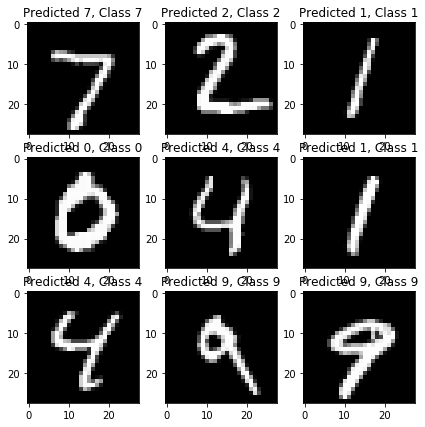

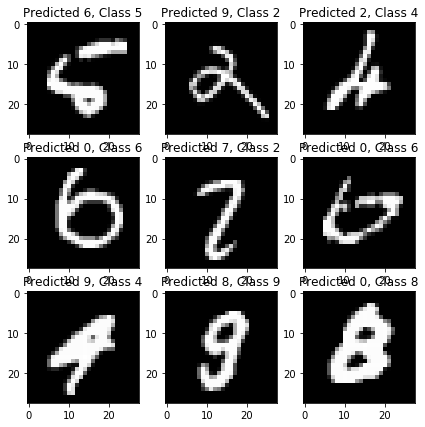

In [14]:

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

In [16]:
import cv2
import numpy as np

img=cv2.imread("20191211232521.jpg")
#cv2.imshow("mw",img)
#cv2.waitKey(0)
import cv2
import numpy as np
W=290
L=455
NW=280
NL=280
X0=125
Y0=160
for i in range(2):
    for j in range(4):
        imdig=img[X0+L*i:X0+L*i+NL,Y0+W*j:Y0+W*j+NW]
        cv2.imshow("imdig",imdig)
        filename="hn"+str(i)+str(j)+".jpg"
        cv2.rectangle(img,(Y0+W*j,X0+L*i),(Y0+W*j+NW,X0+L*i+NL),(0,255,0),3)        
        cv2.imwrite(filename,imdig)
        cv2.waitKey(0)
cv2.imshow("img",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
import cv2  

for i in range(2):
    for j in range(4):
        filename="hn"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
        ret,thresh1=cv2.threshold(GrayImage,120,255,cv2.THRESH_BINARY)  
        resized_image = cv2.resize(thresh1, (28, 28)) 
        invimg = ~resized_image
        outputfile="hn28inv"+str(i)+str(j)+".jpg"
        print(outputfile)
        cv2.imwrite(outputfile,invimg)

hn28inv00.jpg
hn28inv01.jpg
hn28inv02.jpg
hn28inv03.jpg
hn28inv10.jpg
hn28inv11.jpg
hn28inv12.jpg
hn28inv13.jpg


In [18]:
import cv2
img = cv2.imread("hn28inv11.jpg")
print(len(img))
print(len(img[0]))
cv2.imshow("hninv",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

28
28


x to be predicted original shape (28, 28, 3)
x to be predicted original shape (28, 28)


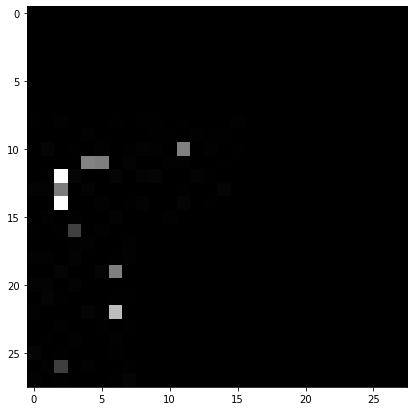

In [19]:
print("x to be predicted original shape", img.shape)
GrayImg=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print("x to be predicted original shape", GrayImg.shape)
plt.imshow(GrayImg, cmap='gray', interpolation='none')


In [20]:
X_pred = GrayImg.reshape(1, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Predicating matrix shape", X_pred.shape)

Predicating matrix shape (1, 784)


In [21]:
predicted_classes = model.predict_classes(X_pred)

print(predicted_classes)

[7]


In [22]:
import cv2
import numpy

X_pred = numpy.zeros(shape=(8,28,28))
index=0

for i in range(2):
    for j in range(4):
        filename="hn28inv"+str(i)+str(j)+".jpg"
        img = cv2.imread(filename)
        GrayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        X_pred[index]=cv2.resize(GrayImage, (28, 28))
        index+=1
print(X_pred.shape)

(8, 28, 28)


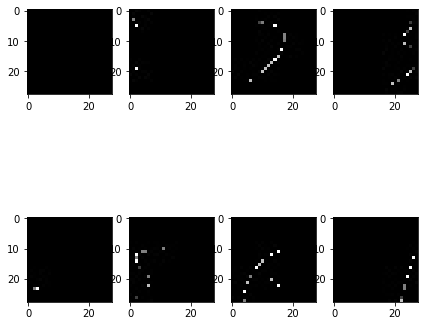

In [23]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(X_pred[i], cmap='gray', interpolation='none')

In [24]:
X_pred = X_pred.reshape(8, 784)
X_pred = X_pred.astype('float32')
X_pred /= 255
print("Testing matrix shape", X_pred.shape)
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

Testing matrix shape (8, 784)
[5 5 2 5 5 7 5 2]


In [25]:
model.save("ministxkn.h5")

In [26]:
del model

In [27]:
try:
    predicted_classes = model.predict_classes(X_pred)
except:
    print("model not found, you have deleted it on purpose.")

model not found, you have deleted it on purpose.


In [31]:
from keras.models import load_model

model = load_model('ministxkn.h5')

In [32]:
print(X_train.shape)
print(X_pred.shape)

(60000, 784)
(8, 784)


In [33]:
print(X_train.shape)
print(X_pred.shape)

(60000, 784)
(8, 784)


In [34]:
print(X_train[0:8])
print(X_pred[0:8])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01176471 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [35]:
X_train[0:8]=X_pred
print(X_train[0:8])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.01176471 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [36]:
for i in range(8):
    y_train[i]=i

In [37]:
print(y_train[0:10])

[0 1 2 3 4 5 6 7 1 4]


In [38]:
Y_train = np_utils.to_categorical(y_train, nb_classes)

In [39]:
print(Y_train[0:10])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [40]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 10s 162us/step - loss: 0.0460 - val_loss: 0.0621
Epoch 2/4
60000/60000 [==============================] - 9s 152us/step - loss: 0.0387 - val_loss: 0.0626
Epoch 3/4
60000/60000 [==============================] - 9s 156us/step - loss: 0.0319 - val_loss: 0.0643
Epoch 4/4
60000/60000 [==============================] - 9s 153us/step - loss: 0.0310 - val_loss: 0.0648


In [41]:
predicted_classes = model.predict_classes(X_pred)
print(predicted_classes)

[5 1 2 3 4 5 6 7]
